In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [2]:
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [3]:
#Checking correlation 
data.corr()

C:\Users\ankus\AppData\Local\Temp\ipykernel_11232\662457176.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [4]:
#Converting String date-time to date-time format
data['Date'] = pd.to_datetime(data['Date'],
                              infer_datetime_format=True)
data.set_index('Date', inplace=True)

data.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [5]:
#Checking NULL values in dataset
data.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [6]:
#Drop missing values
data = data.dropna()

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2023')

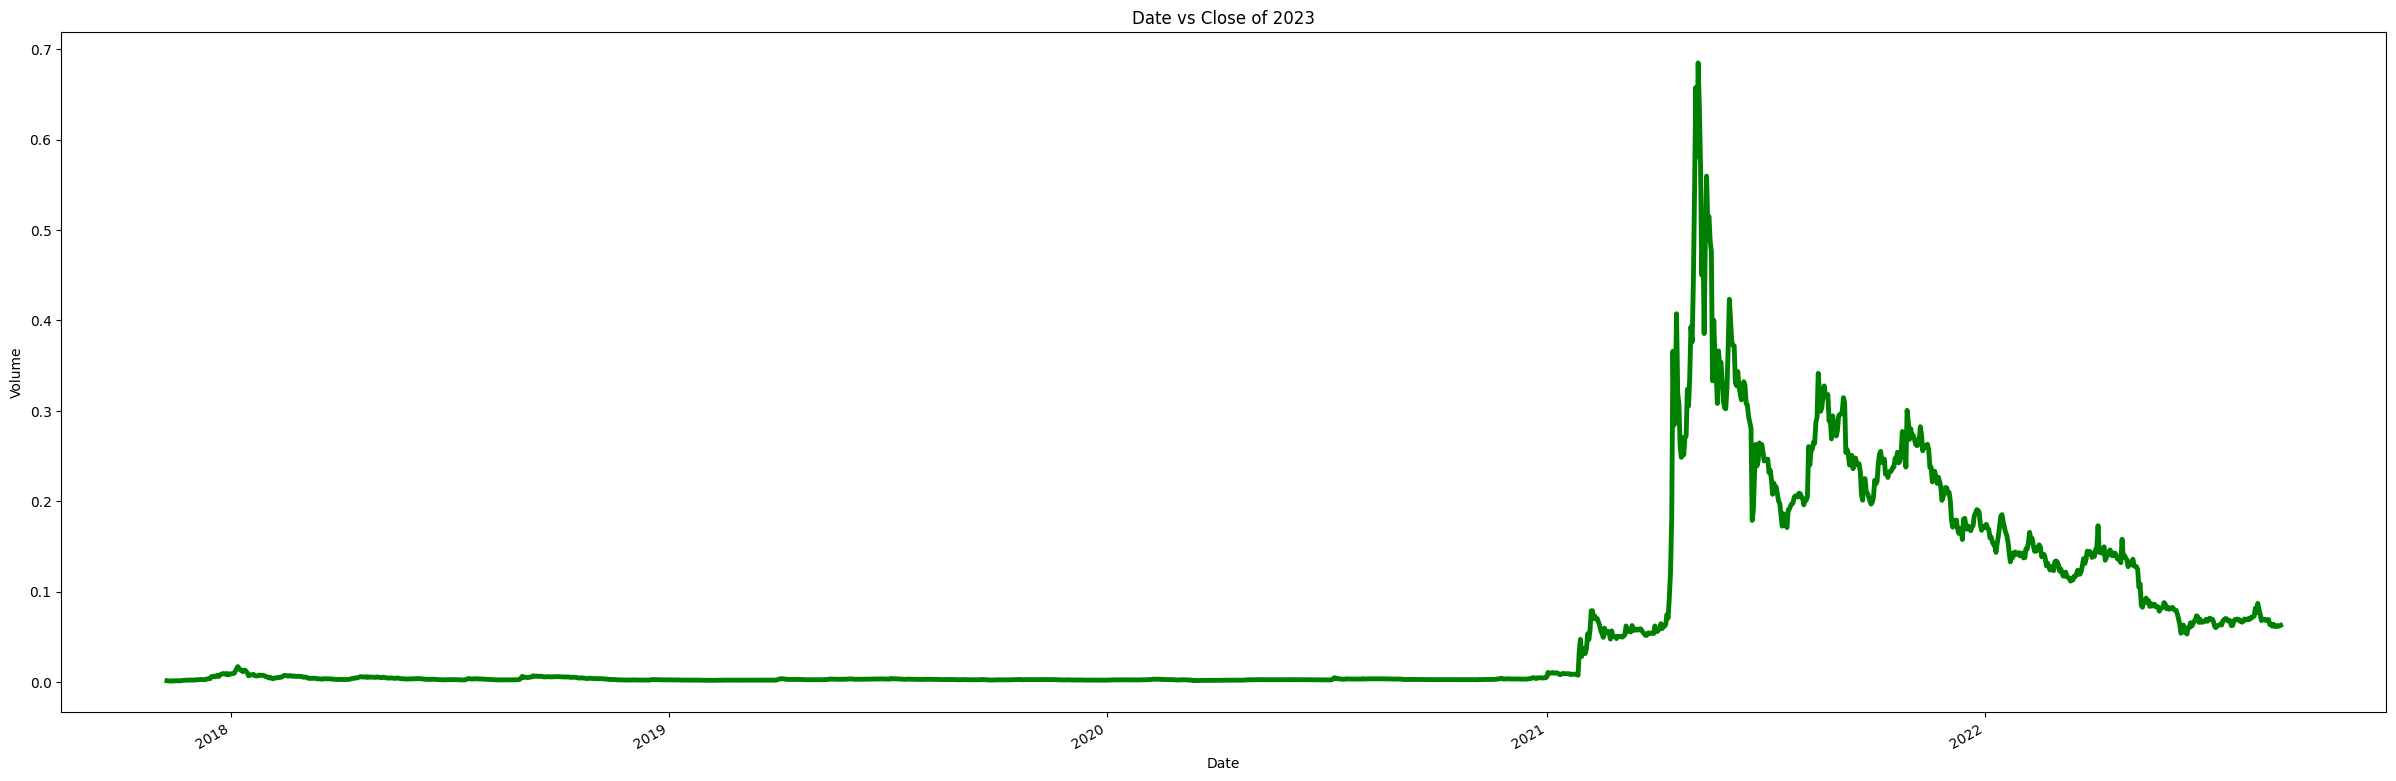

In [8]:
#analyze the closing price as we need it to perform the prediction

plt.figure(figsize=(30,10))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth = 3.5, color= 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2023")

In [9]:
#we are checking each factor while correlating with the ‘Close’ column while sorting it in descending order.

data["gap"] = (data["High"]- data['Low'])* data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

In [10]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [11]:
data_df = data.tail(50)
train = data_df[0:11]
test = data_df[-49:0]
print(train.shape, test.shape)


(11, 5) (0, 5)


In [12]:
#Implementing SARIMAX model

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())

c:\Users\ankus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ankus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\ankus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ankus\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA para

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  48.182
Date:                Sun, 09 Jul 2023   AIC                            -80.365
Time:                        10:26:46   BIC                            -77.944
Sample:                    07-16-2022   HQIC                           -83.020
                         - 07-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      3.244e-10   1.83e-10      1.773      0.076   -3.41e-11    6.83e-10
gap         1.687e-09   3.16e-09      0.533      0.594   -4.52e-09    7.89e-09
a              0.0090   2.24e-13   4.04e+10      0.0